In [1]:
import sys
import os

SCRIPT_DIR = os.path.dirname(os.path.abspath("."))
sys.path.append(os.path.dirname(SCRIPT_DIR))

from src import results
import importlib
import pathlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from src.plotting import plot_fill_between_mean_std,plot_fill_between_min_max
from src.plotting import plot_matrix_fill_between_mean_min_max,plot_matrix_fill_between_mean_std

Valores iniciais: 
- T_MIN=0.1
- T_MAX=6
- N_ITS=100
- EVAP_R=0.1
- ALPHA=1

In [2]:
folders = list(pathlib.Path("../../results/brock800_4/").glob("*_ants"))

In [4]:
results_agg_per_run = dict()
for folder in folders:
    folder_name = str(folder).split("/")[-1]
    files_of_folder = list(folder.glob("*.csv"))
    results_agg = results.ResultsAgg()
    results_agg.agg_files(files_of_folder, delimiter=",")
    results_agg_per_run[folder_name] = results_agg

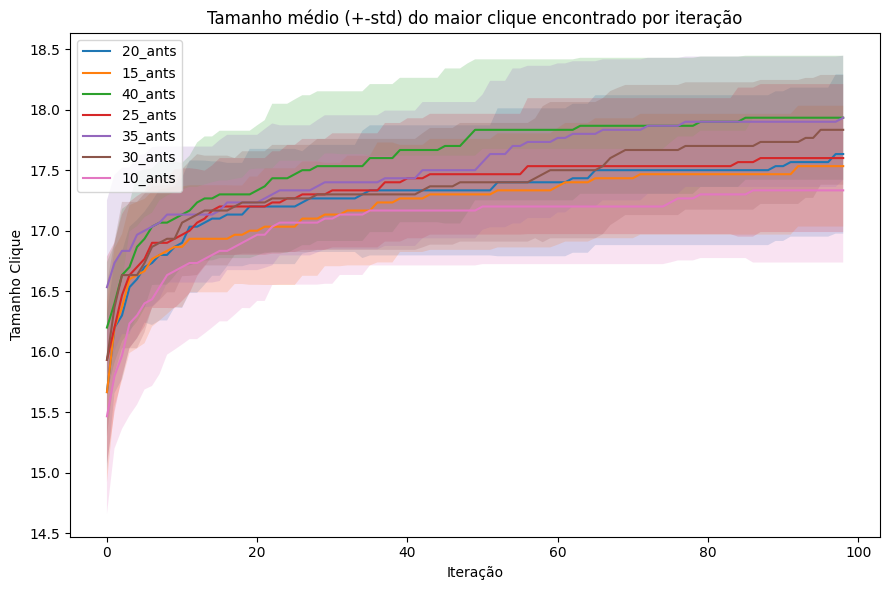

In [5]:
fig, ax = plt.subplots(figsize=(9, 6))
for run, results_agg in results_agg_per_run.items():
    # plot_matrix_fill_between_mean_min_max(list(results_agg.per_it_max_clique.values()), ax, run)
    plot_matrix_fill_between_mean_std(list(results_agg.per_it_max_clique.values()), ax, run)

ax.legend()
ax.set_ylabel("Tamanho Clique")
ax.set_xlabel("Iteração")
ax.set_title("Tamanho médio (+-std) do maior clique encontrado por iteração")
fig.tight_layout()

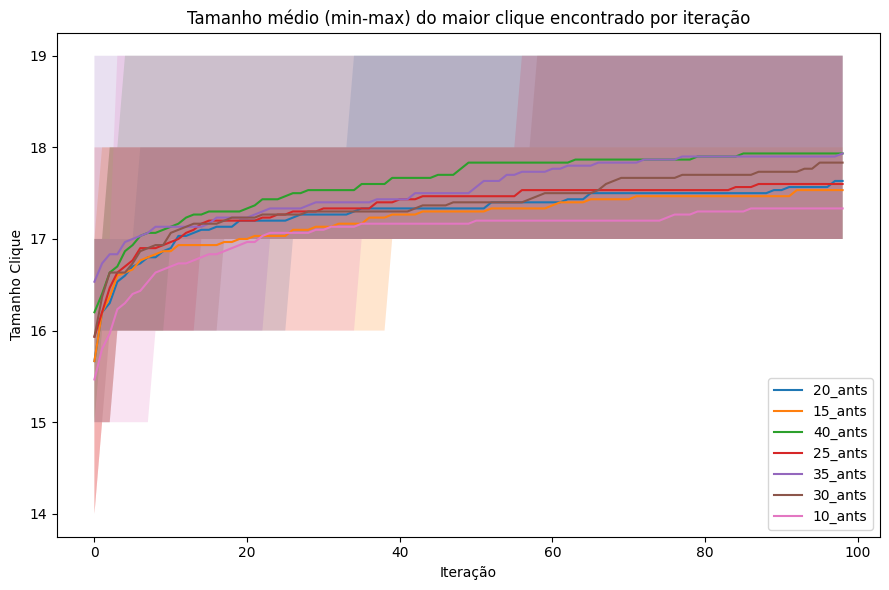

In [10]:
fig, ax = plt.subplots(figsize=(9, 6))
for run, results_agg in results_agg_per_run.items():
    plot_matrix_fill_between_mean_min_max(list(results_agg.per_it_max_clique.values()), ax, run)
    #plot_matrix_fill_between_mean_std(list(results_agg.per_it_max_clique.values()), ax, run)

ax.legend()
ax.set_ylabel("Tamanho Clique")
ax.set_xlabel("Iteração")
ax.set_title("Tamanho médio (min-max) do maior clique encontrado por iteração")
plt.legend(loc="lower right")
fig.tight_layout()

Pelo gráfico acima, pode-se perceber que quanto mais formigas estão disponíveis, maior o clique final encontrado ao final. Além disso, também é possível ver que, ao usar mais formigas, encontra-se cliques maiores mais rapidamente. No caso, as execuções com 40 formigas obtiveram os melhores resultados, porém o maior clique encontrado durante as repetições foi de tamanho 19.

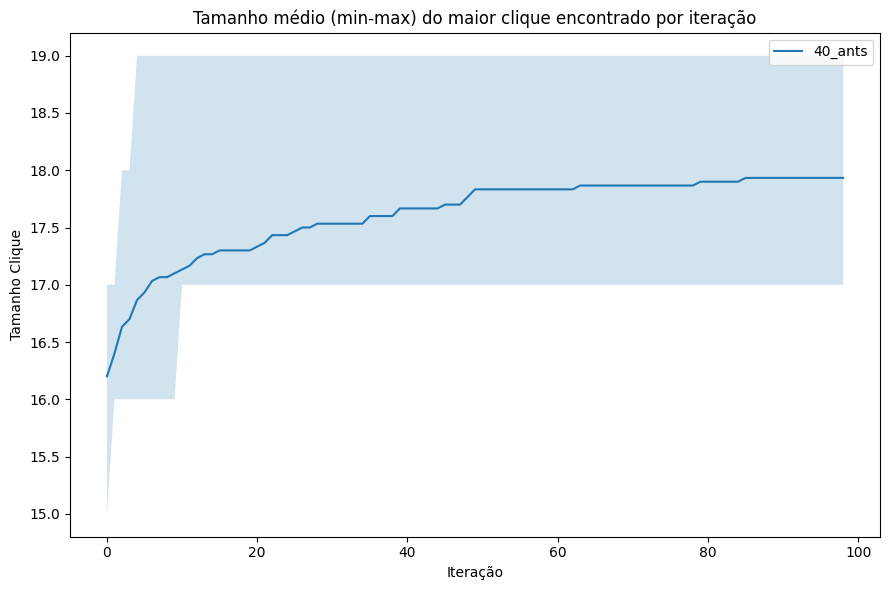

In [8]:
fig, ax = plt.subplots(figsize=(9, 6))
target_runs = ['40_ants']
target_runs_values = [(key, values) for key, values in results_agg_per_run.items() if key in target_runs]
for run, results_agg in target_runs_values:
    plot_matrix_fill_between_mean_min_max(list(results_agg.per_it_max_clique.values()), ax, run)

ax.legend()
ax.set_ylabel("Tamanho Clique")
ax.set_xlabel("Iteração")
ax.set_title("Tamanho médio (min-max) do maior clique encontrado por iteração")
fig.tight_layout()

O maior clique encontrado foi: [753, 331, 150, 19, 285, 768, 526, 709, 189, 459, 350, 233, 124, 135, 649, 731, 632, 432, 273], com 19 nós.